# The Hello World of Deep Learning with Neural Networks


Comecemos con algo simple: una función deterministica

float hw_function(float x){
    float y = (2 * x) - 1;
    return y;
}

Como entrenamos una red para aprender esta función? 

Entrenando una red con suficientes datos (Xs, Ys), el sistema deberia poder encontrar la relación. 


Importando librerias

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

Definamos la red mas sencilla

In [2]:
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])

Compilemos el modelo para que evalue con el MSE y optimice el suguiente paso con gradientes estocasticos

In [3]:
model.compile(optimizer='sgd', loss='mean_squared_error')

entreguemos algunos datos al modelo

In [4]:
xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

entrenemos la red

In [5]:
model.fit(xs, ys, epochs=500)

Train on 6 samples
Epoch 1/500
6/6 [==============================] - 1s 148ms/sample - loss: 46.9976
Epoch 2/500
6/6 [==============================] - 0s 1000us/sample - loss: 37.3580
Epoch 3/500
6/6 [==============================] - 0s 666us/sample - loss: 29.7662
Epoch 4/500
6/6 [==============================] - 0s 666us/sample - loss: 23.7856
Epoch 5/500
6/6 [==============================] - 0s 666us/sample - loss: 19.0728
Epoch 6/500
6/6 [==============================] - 0s 831us/sample - loss: 15.3577
Epoch 7/500
6/6 [==============================] - 0s 831us/sample - loss: 12.4275
Epoch 8/500
6/6 [==============================] - 0s 666us/sample - loss: 10.1151
Epoch 9/500
6/6 [==============================] - 0s 666us/sample - loss: 8.2889
Epoch 10/500
6/6 [==============================] - 0s 836us/sample - loss: 6.8454
Epoch 11/500
6/6 [==============================] - 0s 833us/sample - loss: 5.7030
Epoch 12/500
6/6 [==============================] - 0s 667us/sample 

Evaluemos la respuesta del modelo

In [6]:
print(model.predict([10.0]))

[[18.976824]]


# Primera aproximación a "Computer Vision"

In [1]:
import tensorflow as tf
print(tf.__version__)

2.1.0


Vamos a importar la base Fashion MNIST  del API de KERAS

In [2]:
mnist = tf.keras.datasets.fashion_mnist

Vamos a importar datos de entrenamiento y validación

In [4]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

Exploremos los datos

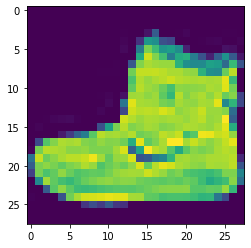

In [5]:
import matplotlib.pyplot as plt
plt.imshow(training_images[0])


In [7]:
#import matplotlib.pyplot as plt
#print(training_labels[0])
print(training_images)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [8]:
type(training_images)

numpy.ndarray

Normailicemos los datos

In [12]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

Definamos la red

In [13]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

Sequential: Define la secuencia de capas

Flatten: transforma la matriz en un vector.

Dense: define el numero de neuronas de la capa

Cada capa requiere una función de activación

Relu  "If X>0 return X, else return 0" -- solo pasa valores positivos 

Softmax devuelve el mayor dentro de un vector 

entrenemos la red

In [14]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.5038 - accuracy: 0.8248
Epoch 2/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.3795 - accuracy: 0.8639
Epoch 3/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.3395 - accuracy: 0.8757
Epoch 4/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.3133 - accuracy: 0.8856
Epoch 5/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2989 - accuracy: 0.8900
Epoch 6/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2823 - accuracy: 0.8960
Epoch 7/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.2691 - accuracy: 0.8991
Epoch 8/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.2589 - accuracy: 0.9033
Epoch 9/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2499 - accuracy: 0.9064
Epoch 10/10
60

evaluemos el modelo

In [15]:

model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 90us/sample - loss: 0.3436 - accuracy: 0.8797


[0.34359648132324216, 0.8797]

In [16]:
classifications = model.predict(test_images)

print(classifications[0])

[7.10002666e-07 1.65904387e-10 2.05897788e-08 1.94076333e-09
 1.09246265e-07 1.44949983e-04 7.89687874e-07 1.74722553e-03
 2.03908229e-07 9.98105884e-01]


In [17]:
print(test_labels[0])

9


Que sucede si cambiamos el numero de neuronas

In [18]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=10)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.1.0
11493376/11490434 [==============================] - 2s 0us/step
Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.1868
Epoch 2/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.0731
Epoch 3/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.0479
Epoch 4/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.0350
Epoch 5/10
60000/60000 [==============================] - 4s 62us/sample - loss: 0.0265
Epoch 6/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.0212
Epoch 7/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.0167
Epoch 8/10
60000/60000 [==============================] - 4s 62us/sample - loss: 0.0156
Epoch 9/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.0139
Epoch 10/10
10000/10000 [==============================] - 1s 71us/sample - loss: 0.1067
[5.3330455e-17 8.4339362e

 si quitamos el flattern

In [19]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(5, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.1.0
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 73us/sample - loss: nan
Epoch 2/5
60000/60000 [==============================] - 4s 64us/sample - loss: nan
Epoch 3/5
60000/60000 [==============================] - 4s 64us/sample - loss: nan
Epoch 4/5
60000/60000 [==============================] - 4s 60us/sample - loss: nan
Epoch 5/5
10000/10000 [==============================] - 1s 66us/sample - loss: nan
[nan nan nan nan nan]
7


Consideremos el efecto de de una capa adicional

In [20]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.1.0
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 91us/sample - loss: 0.1875
Epoch 2/5
60000/60000 [==============================] - 5s 87us/sample - loss: 0.0809
Epoch 3/5
60000/60000 [==============================] - 4s 74us/sample - loss: 0.0565
Epoch 4/5
60000/60000 [==============================] - 5s 80us/sample - loss: 0.0424
Epoch 5/5
10000/10000 [==============================] - 1s 60us/sample - loss: 0.0987
[2.2900770e-13 2.2825318e-10 1.4168861e-10 1.3145402e-11 1.7155001e-12
 3.0417367e-11 7.0707134e-18 9.9999976e-01 6.0766075e-12 2.8122292e-07]
7


Siempre tenemos que definie las iteraciones y esperar hasta el final?

In [21]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.6):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

callbacks = myCallback()

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

Train on 60000 samples
Epoch 1/10
59776/60000 [============================>.] - ETA: 0s - loss: 0.4756 - accuracy: 0.8286
Reached 60% accuracy so cancelling training!
60000/60000 [==============================] - 5s 88us/sample - loss: 0.4754 - accuracy: 0.8286
